In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(city_df, ride_df, how='outer', on='city')

In [2]:
# Display the data table for preview
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [3]:
urban_df = pyber_df[pyber_df['type'] == "Urban"]
suburban_df = pyber_df[pyber_df['type'] == "Suburban"]
rural_df = pyber_df[pyber_df['type'] == "Rural"]

urban_cities = urban_df.groupby('city')
suburban_cities = suburban_df.groupby('city')
rural_cities = rural_df.groupby('city')

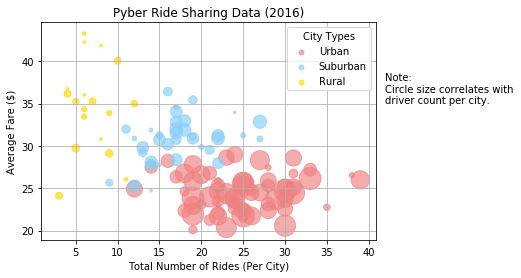

In [4]:
# Obtain the x and y coordinates for each of the three city types
urban_x = urban_cities['ride_id'].count()
suburban_x = suburban_cities['ride_id'].count()
rural_x = rural_cities['ride_id'].count()

urban_y = urban_cities['fare'].mean()
suburban_y = suburban_cities['fare'].mean()
rural_y = rural_cities['fare'].mean()

urban_size = urban_cities['driver_count'].mean() * 7
suburban_size = suburban_cities['driver_count'].mean() * 7
rural_size = rural_cities['driver_count'].mean() * 7

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, marker="o", facecolors="lightcoral",
            s=urban_size, alpha=0.65, label="Urban")
plt.scatter(suburban_x, suburban_y, marker="o", facecolors="lightskyblue",
            s=suburban_size, alpha=0.65, label="Suburban")
plt.scatter(rural_x, rural_y, marker="o", facecolors="gold",
            s=rural_size, alpha=0.65, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(loc="best", title = "City Types")
lgnd.legendHandles[0]._sizes = [25]
lgnd.legendHandles[1]._sizes = [25]
lgnd.legendHandles[2]._sizes = [25]

# Incorporate a text label regarding circle size
plt.text(42, 35, 'Note:\nCircle size correlates with\ndriver count per city.')

# Save Figure
plt.savefig("images/pyber_ride_sharing_data_2016.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

## Total Fares by City Type

In [5]:
# Calculate Type Percents
city_types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

urban_fares = urban_df['fare'].sum()
suburban_fares = suburban_df['fare'].sum()
rural_fares = rural_df['fare'].sum()

city_fares = [rural_fares, suburban_fares, urban_fares]

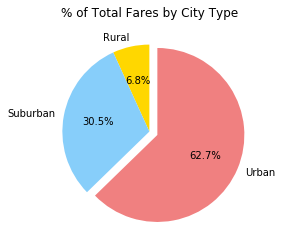

In [6]:
# Build Pie Chart
plt.pie(city_fares, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", startangle=90)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("images/total_fares_by_city_type_2016.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

# Show Figure
plt.show()

## Total Rides by City Type

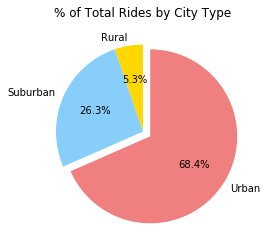

In [7]:
# Calculate Ride Percents
urban_rides = urban_df['ride_id'].count()
suburban_rides = suburban_df['ride_id'].count()
rural_rides = rural_df['ride_id'].count()

city_rides = [rural_rides, suburban_rides, urban_rides]

# Build Pie Chart
plt.pie(city_rides, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", startangle=90)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("images/total_rides_by_city_type_2016.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

# Show Figure
plt.show()

## Total Drivers by City Type

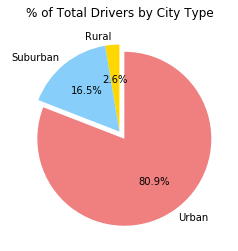

In [8]:
# Calculate Driver Percents

urban_drivers = urban_cities['driver_count'].mean().sum()
suburban_drivers = suburban_cities['driver_count'].mean().sum()
rural_drivers = rural_cities['driver_count'].mean().sum()

city_drivers = [rural_drivers, suburban_drivers, urban_drivers]

# Build Pie Chart
plt.pie(city_drivers, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", startangle=90)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("images/total_drivers_by_city_type_2016.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

# Show Figure
plt.show()

## Observable Trends

1. While rides in urban areas have lower fares per ride (as shown on the first graph), they still have the largest share of total fares.

2. Riders in rural areas have less drivers available and higher fares than urban and suburban riders.

3. Pyber operates in very few rural cities compared to the number of urban and suburban cities.